<a href="https://colab.research.google.com/github/menna03/Sales-Prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

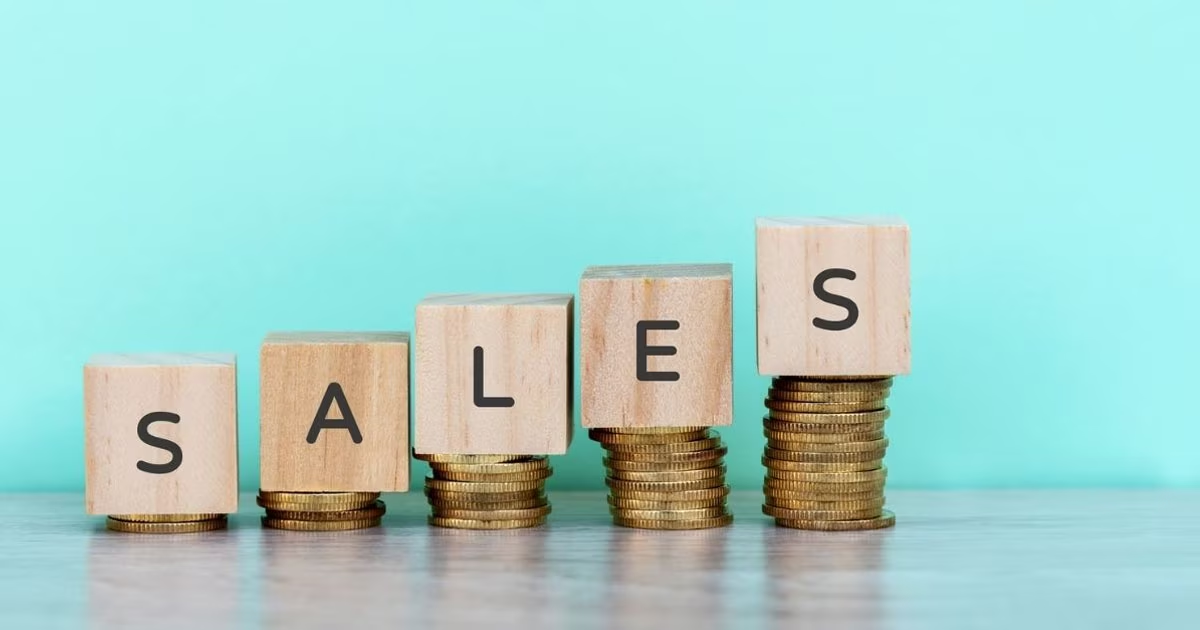

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from matplotlib.ticker import PercentFormatter

In [3]:
sales = pd.read_csv('/content/advertising (1).csv')


In [4]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
sales.isna().sum()* 100 / len(sales)


TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

Text(0.5, 0, 'Amount')

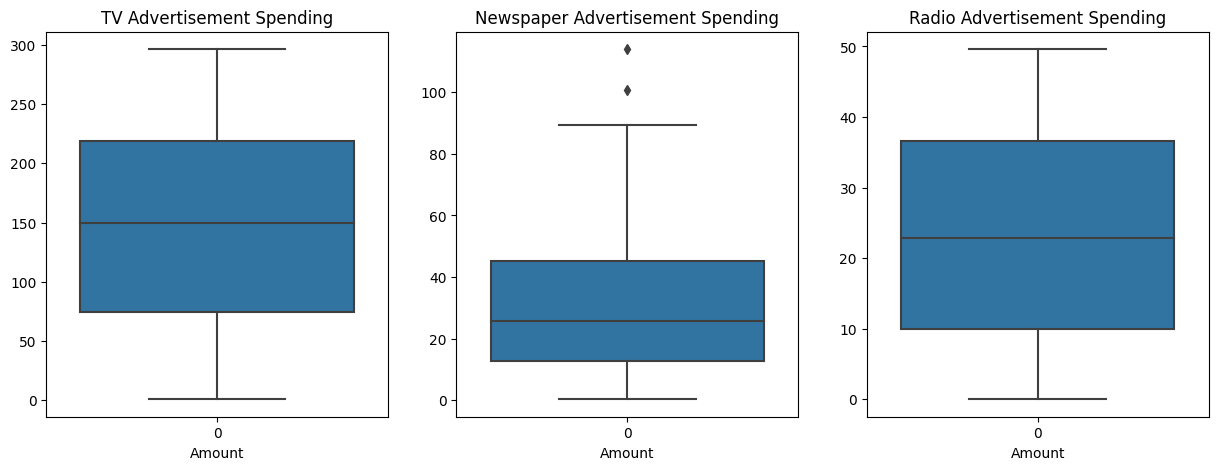

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 1x3 grid of subplots with a larger size
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot for 'TV' column
plt1 = sns.boxplot(sales['TV'], ax=axs[0])
axs[0].set_title('TV Advertisement Spending')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('')

# Plot for 'Newspaper' column
plt2 = sns.boxplot(sales['Newspaper'], ax=axs[1])
axs[1].set_title('Newspaper Advertisement Spending')
axs[1].set_xlabel('Amount')
axs[1].set_ylabel('')

# Plot for 'Radio' column
plt3 = sns.boxplot(sales['Radio'], ax=axs[2])
axs[2].set_title('Radio Advertisement Spending')
axs[2].set_xlabel('Amount')


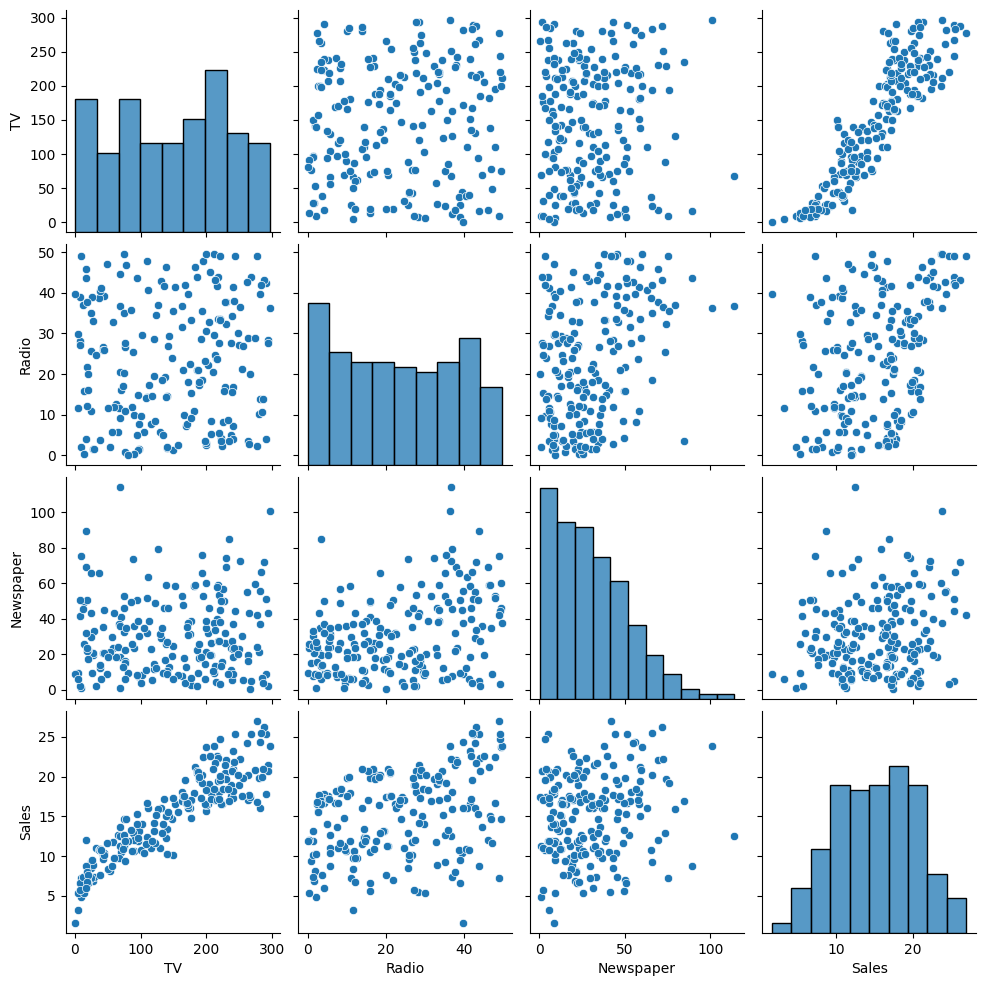

In [8]:

sns.pairplot(sales)

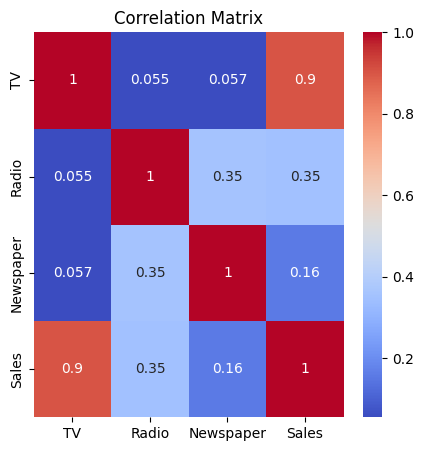

In [10]:

correlation_matrix = sales.corr()

plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
sales.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Multiple linear regression (MLR)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [13]:

X = sales[['TV', 'Radio', 'Newspaper']]  # Predictor variables
y = sales['Sales']  # Target variable


In [14]:

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:

# Create and fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



In [17]:

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

# Print the coefficients of the model
coefficients = model.coef_
print('Coefficients:', coefficients)

# Print the intercept of the model
intercept = model.intercept_
print('Intercept:', intercept)

Mean Squared Error (MSE): 2.91
Root Mean Squared Error (RMSE): 1.71
R-squared (R2) Score: 0.91
Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214127


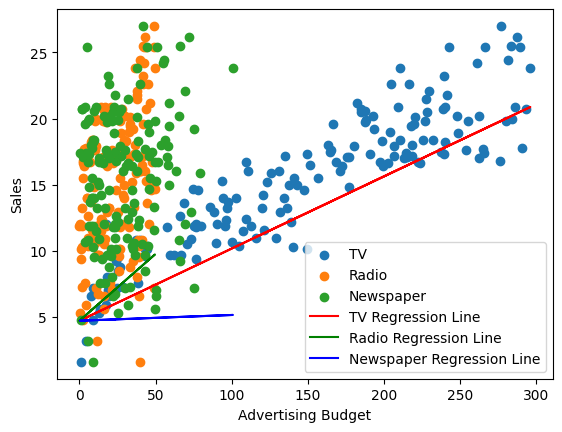

In [18]:
import matplotlib.pyplot as plt
# Create a scatter plot of the training data
plt.scatter(X_train['TV'], y_train, label='TV')
plt.scatter(X_train['Radio'], y_train, label='Radio')
plt.scatter(X_train['Newspaper'], y_train, label='Newspaper')

# Plot the regression lines for each predictor variable
plt.plot(X_train['TV'], model.coef_[0] * X_train['TV'] + model.intercept_, 'r', label='TV Regression Line')
plt.plot(X_train['Radio'], model.coef_[1] * X_train['Radio'] + model.intercept_, 'g', label='Radio Regression Line')
plt.plot(X_train['Newspaper'], model.coef_[2] * X_train['Newspaper'] + model.intercept_, 'b', label='Newspaper Regression Line')

# Add labels and legend
plt.xlabel('Advertising Budget')
plt.ylabel('Sales')
plt.legend()

# Show the plot
plt.show()


# Simple linear regression

In [19]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [20]:
X = sales[['TV']]  # Predictor variable 'TV'
y = sales['Sales']  # Target variable 'Sales'


In [21]:
# Create a simple linear regression model for 'TV'
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [22]:
# Make predictions using the model
y_pred = model.predict(X)


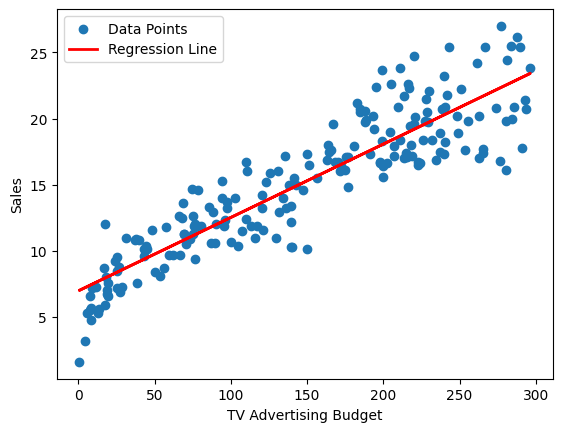

In [23]:
# Plot the scatter plot of 'TV' vs. 'Sales'
plt.scatter(X, y, label='Data Points')

# Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and legend
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()

# Show the plot
plt.show()

In [24]:
# Print the model coefficients and intercept
print(f'Coefficient (slope): {model.coef_[0]:.2f}')
print(f'Intercept: {model.intercept_:.2f}')

Coefficient (slope): 0.06
Intercept: 6.97


In [25]:
# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

# Print the coefficients of the model
coefficient = model.coef_[0]
print('Coefficient (slope):', coefficient)

# Print the intercept of the model
intercept = model.intercept_
print('Intercept:', intercept)

Mean Squared Error (MSE): 5.22
Root Mean Squared Error (RMSE): 2.28
R-squared (R2) Score: 0.81
Coefficient (slope): 0.055464770469558874
Intercept: 6.974821488229891
